In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [43]:
data_train = pd.read_csv("kendaraan_train.csv")
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [44]:
data_train.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


# Pre-Processing

In [46]:
data_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [47]:
data_train.drop('id', inplace=True, axis=1)
umur_median = data_train['Umur'].median()
premi_median = data_train['Premi'].median()
berlangganan_median = data_train['Lama_Berlangganan'].median()
data_train['Umur'].fillna(umur_median, inplace=True)
data_train['Premi'].fillna(premi_median, inplace=True)
data_train['Lama_Berlangganan'].fillna(berlangganan_median, inplace=True)
data_train['Jenis_Kelamin'].fillna("Pria", inplace=True)
data_train.ffill(inplace=True)

In [48]:
data_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

# Data Visualization

array([[<AxesSubplot:title={'center':'Umur'}>,
        <AxesSubplot:title={'center':'SIM'}>,
        <AxesSubplot:title={'center':'Kode_Daerah'}>],
       [<AxesSubplot:title={'center':'Sudah_Asuransi'}>,
        <AxesSubplot:title={'center':'Premi'}>,
        <AxesSubplot:title={'center':'Kanal_Penjualan'}>],
       [<AxesSubplot:title={'center':'Lama_Berlangganan'}>,
        <AxesSubplot:title={'center':'Tertarik'}>, <AxesSubplot:>]],
      dtype=object)

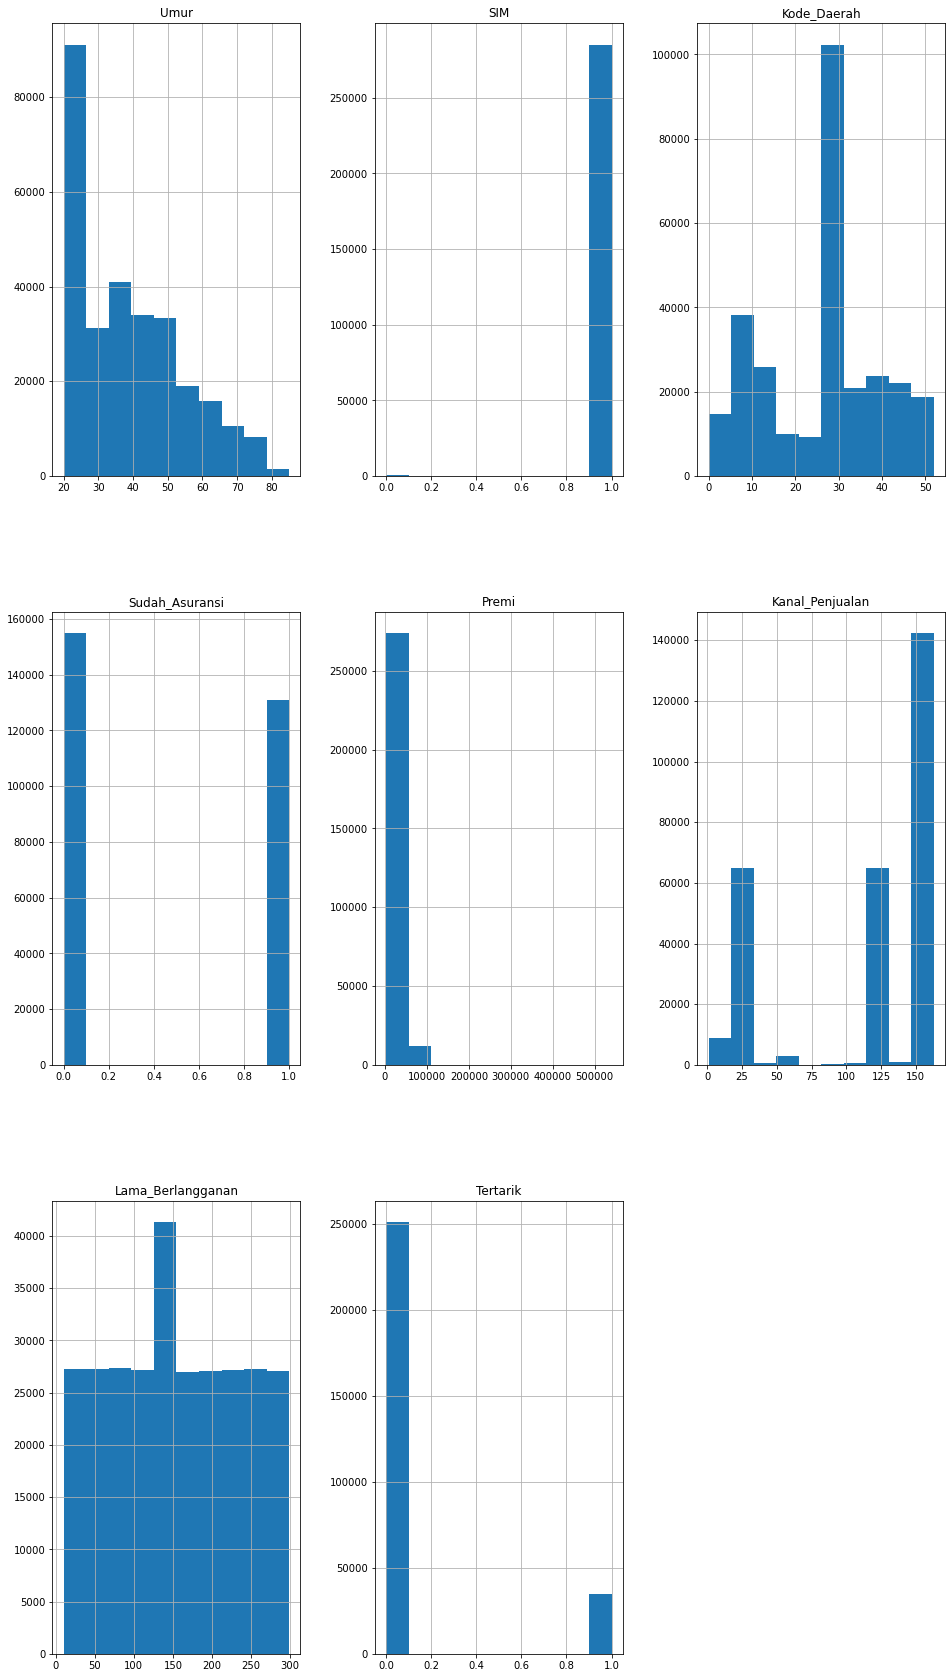

In [49]:
data_train.hist(figsize=(16,30))

Text(0, 0.5, 'Car Numbers')

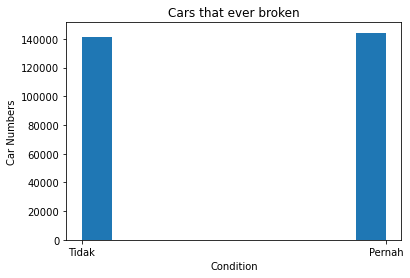

In [50]:
fig, ax = plt.subplots()

ax.hist(data_train['Kendaraan_Rusak'])
ax.set_title('Cars that ever broken')
ax.set_xlabel('Condition')
ax.set_ylabel('Car Numbers')

<AxesSubplot:xlabel='Umur_Kendaraan', ylabel='Tertarik'>

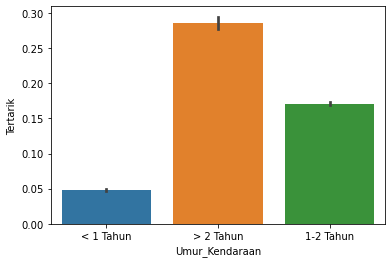

In [51]:
sns.barplot(x='Umur_Kendaraan', y='Tertarik', data=data_train)